In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [4]:
# Load the dataset
data = pd.read_csv("/content/wine.csv")
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
# Task 1: Exploratory Data Analysis (EDA)
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


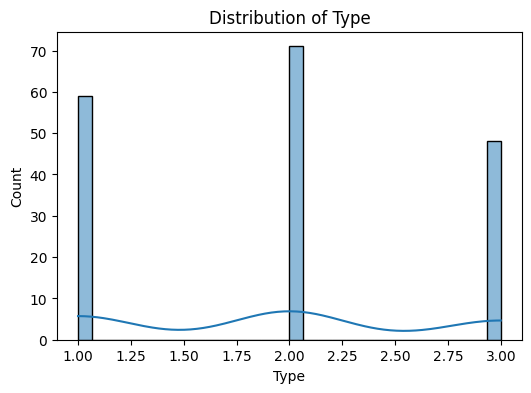

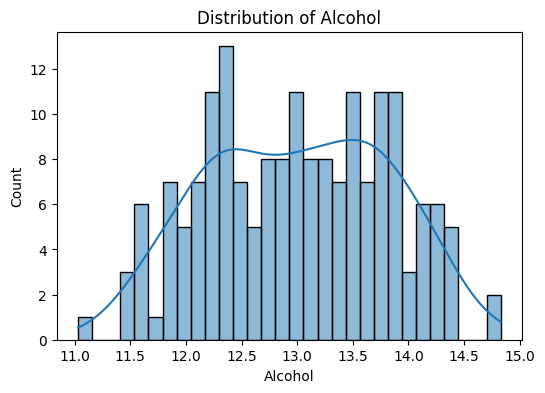

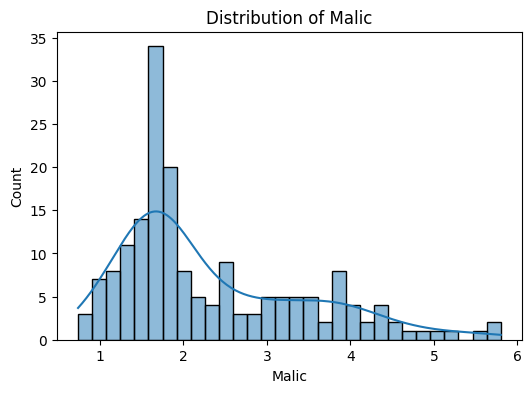

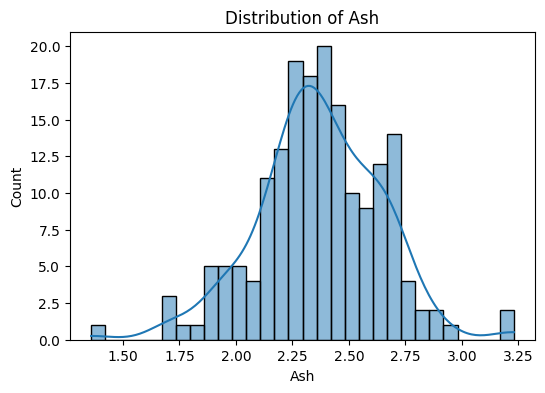

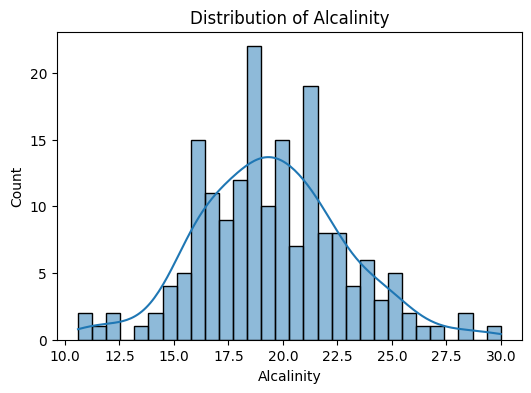

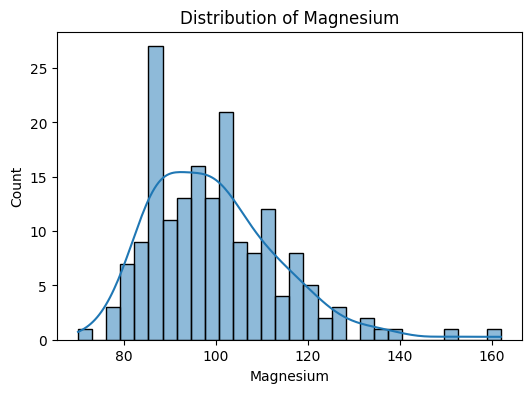

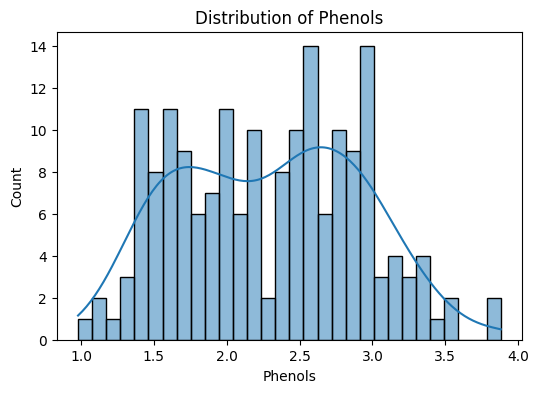

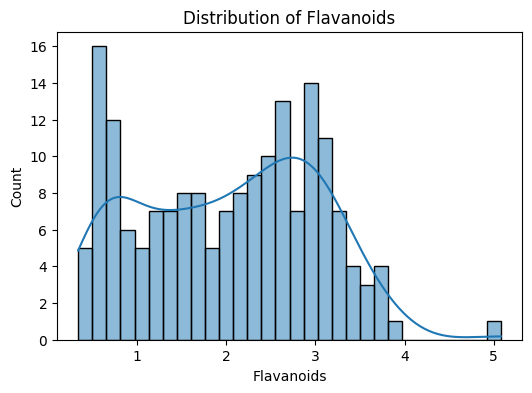

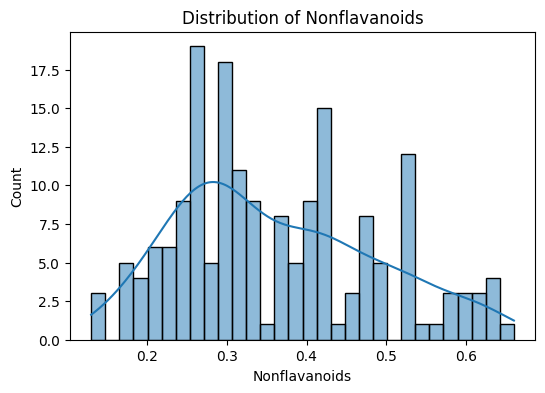

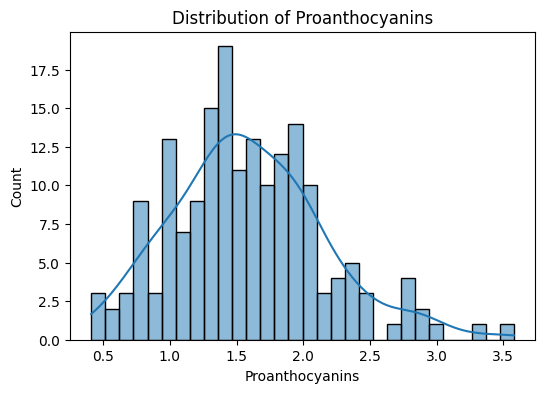

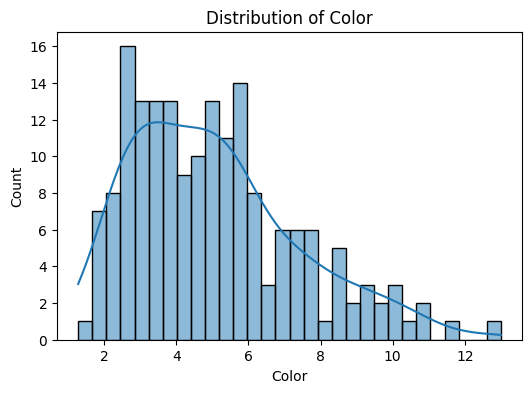

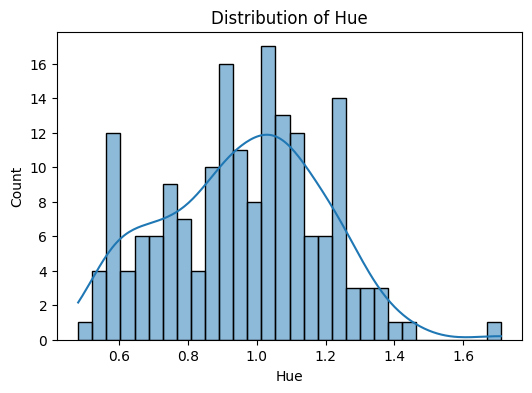

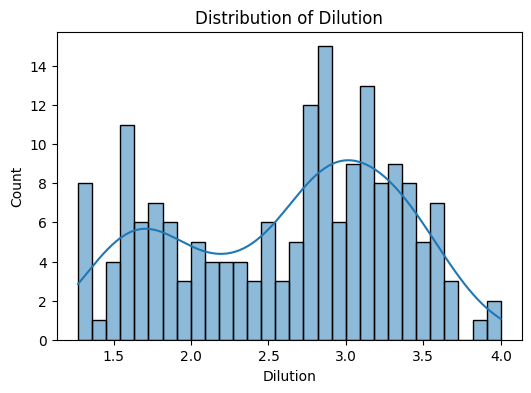

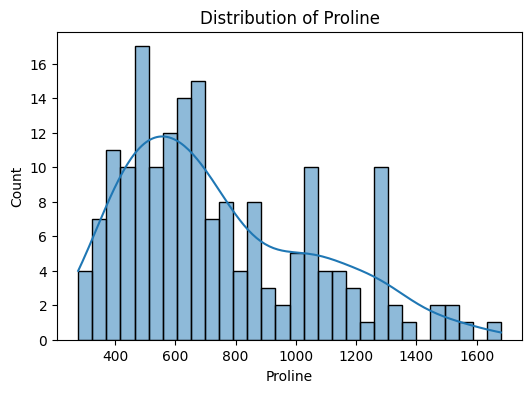

In [6]:
# Visualize feature distributions
for column in data.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

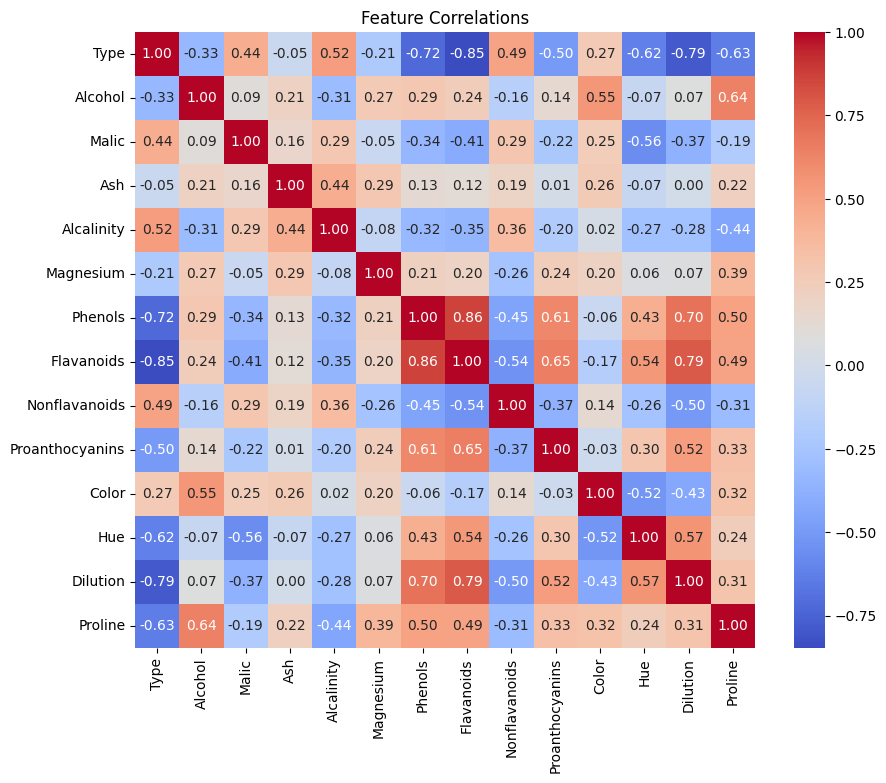

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()

In [9]:
# Task 2: Dimensionality Reduction with PCA
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [11]:
# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(data_scaled)
pca_result

array([[-3.52293390e+00,  1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00, -3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00,  1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00,  2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00,  2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00,  2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

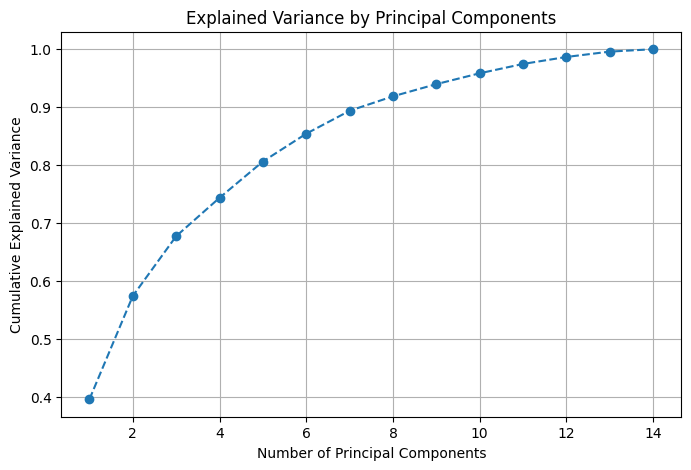

In [12]:
# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title("Explained Variance by Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

In [13]:
# Choose the optimal number of components (e.g., 95% variance)
optimal_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal number of components: {optimal_components}")

pca = PCA(n_components=optimal_components)
data_pca = pca.fit_transform(data_scaled)
data_pca

Optimal number of components: 10


array([[-3.5229339 ,  1.45309844, -0.16479549, ..., -0.05563728,
        -0.45876506, -1.06556955],
       [-2.52885806, -0.33001925, -2.02670665, ..., -1.01037189,
         0.21880609,  0.02018203],
       [-2.78502898,  1.03693595,  0.9832377 , ...,  0.26895705,
         1.22276949,  0.10624913],
       ...,
       [ 3.02727243,  2.75604024, -0.94080304, ..., -0.05254455,
        -0.02788135,  0.21274935],
       [ 2.75522166,  2.29378408, -0.55047368, ..., -0.42651198,
         0.04878416, -0.47979317],
       [ 3.49633565,  2.76060799,  1.01315115, ...,  0.32500213,
        -0.7199834 , -0.07990775]])

In [15]:
# Task 3: Clustering with Original Data
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans.fit_predict(data_scaled)
clusters_original

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [16]:
# Evaluate clustering
silhouette_original = silhouette_score(data_scaled, clusters_original)
davies_original = davies_bouldin_score(data_scaled, clusters_original)
print(f"Silhouette Score (Original Data): {silhouette_original}")
print(f"Davies-Bouldin Index (Original Data): {davies_original}")

Silhouette Score (Original Data): 0.30648398324833453
Davies-Bouldin Index (Original Data): 1.315707552261773


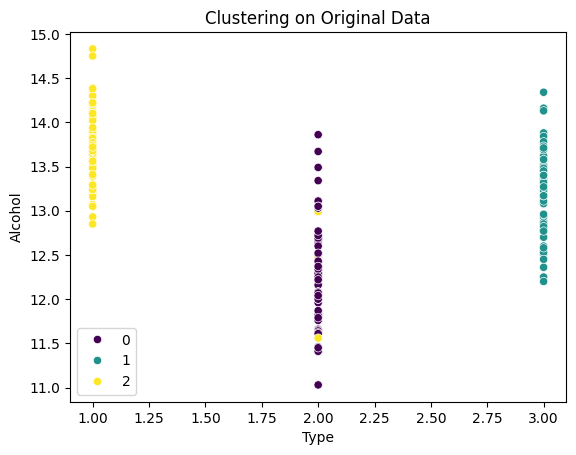

In [17]:
# Visualize clustering
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=clusters_original, palette="viridis")
plt.title("Clustering on Original Data")
plt.show()

In [18]:
# Task 4: Clustering with PCA Data
clusters_pca = kmeans.fit_predict(data_pca)
clusters_pca

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [19]:
# Evaluate clustering
silhouette_pca = silhouette_score(data_pca, clusters_pca)
davies_pca = davies_bouldin_score(data_pca, clusters_pca)
print(f"Silhouette Score (PCA Data): {silhouette_pca}")
print(f"Davies-Bouldin Index (PCA Data): {davies_pca}")

Silhouette Score (PCA Data): 0.32292055407233017
Davies-Bouldin Index (PCA Data): 1.2578453408449173


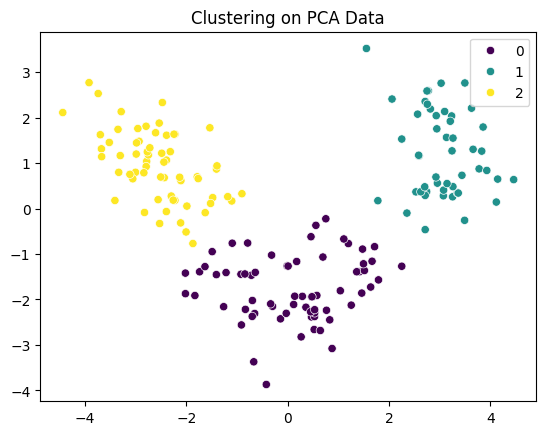

In [20]:
# Visualize clustering
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=clusters_pca, palette="viridis")
plt.title("Clustering on PCA Data")
plt.show()

In [24]:
# Task 5: Comparison and Analysis
print("\nComparison of Clustering Results:")
print(f"Silhouette Score Improvement: {silhouette_pca - silhouette_original}")
print(f"Davies-Bouldin Index Improvement: {davies_original - davies_pca}")


Comparison of Clustering Results:
Silhouette Score Improvement: 0.016436570823995633
Davies-Bouldin Index Improvement: 0.05786221141685566


In [25]:
# Task 6: Conclusion and Insights
#Key Findings
#PCA reduces the dimensionality while retaining most of the variance.
#Clustering performance can improve after PCA due to noise reduction.
#Use PCA when dealing with high-dimensional data to enhance interpretability and efficiency.
